In [3]:
from zipfile import ZipFile
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os

In [4]:
with ZipFile("archive.zip") as f:
    f.extractall()

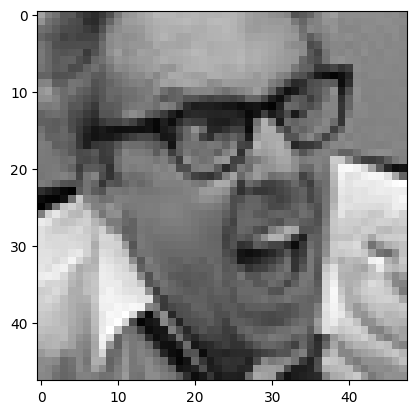

In [7]:
img = cv2.imread("train/angry/Training_3908.jpg")
plt.imshow(img)

In [5]:
expressions = os.listdir("train")
expressions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [8]:
train_gen = train_data_gen.flow_from_directory("train", target_size = (48,48), batch_size=64, color_mode='grayscale',class_mode = 'categorical' )

Found 28709 images belonging to 7 classes.


In [9]:
val_gen = train_data_gen.flow_from_directory("test", target_size = (48,48), batch_size=64, color_mode='grayscale',class_mode = 'categorical' )

Found 7178 images belonging to 7 classes.


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 64)      

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_gen,epochs=10,batch_size=64,validation_data=val_gen,shuffle=True)

Epoch 1/10
449/449 [==============================] - 55s 119ms/step - loss: 1.8854 - accuracy: 0.3191 - val_loss: 1.8441 - val_accuracy: 0.2981
Epoch 2/10
449/449 [==============================] - 58s 130ms/step - loss: 1.4908 - accuracy: 0.4320 - val_loss: 1.3512 - val_accuracy: 0.4783
Epoch 3/10
449/449 [==============================] - 61s 135ms/step - loss: 1.3609 - accuracy: 0.4814 - val_loss: 1.5148 - val_accuracy: 0.4558
Epoch 4/10
449/449 [==============================] - 62s 139ms/step - loss: 1.2842 - accuracy: 0.5103 - val_loss: 1.2529 - val_accuracy: 0.5134
Epoch 5/10
449/449 [==============================] - 61s 136ms/step - loss: 1.2292 - accuracy: 0.5301 - val_loss: 1.2627 - val_accuracy: 0.5244
Epoch 6/10
449/449 [==============================] - 62s 138ms/step - loss: 1.1895 - accuracy: 0.5458 - val_loss: 1.2462 - val_accuracy: 0.5294
Epoch 7/10
449/449 [==============================] - 60s 134ms/step - loss: 1.1485 - accuracy: 0.5629 - val_loss: 1.1510 - val_ac

(48, 48)


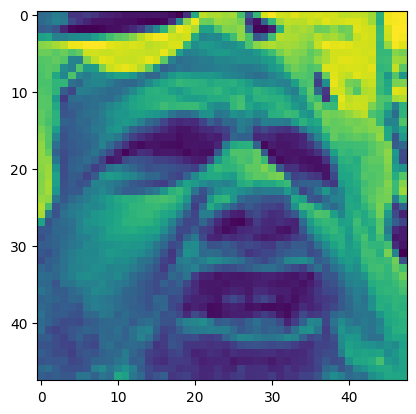

In [21]:
from keras.utils import load_img
img = load_img("test/angry/PrivateTest_731447.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [22]:
from keras.utils import img_to_array
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
res = np.argmax(result[0])
expressions[res]

1/1 [==============================] - 0s 116ms/step


'angry'